In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [ ]:
Now we will add some new features. here booking_cmplete is target

In [11]:
df['total_addons'] = df['wants_preferred_seat'] + df['wants_extra_baggage'] + df['wants_in_flight_meals']


In [12]:
def map_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['flight_hour'].apply(map_time_of_day)


df['is_weekend'] = df['flight_day'].apply(lambda x: 1 if x in [5, 6] else 0)


df['is_group'] = df['num_passengers'].apply(lambda x: 1 if x > 1 else 0)


df['long_stay'] = df['length_of_stay'].apply(lambda x: 1 if x > 7 else 0)

In [13]:
df.to_csv("enhanced customer_booking.csv")

In [13]:
Now we will train a machine learning model

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [16]:
df = pd.read_csv("enhanced customer_booking.csv")
df.head()

,Unnamed: 0,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_addons,time_of_day,is_weekend,is_group,long_stay
0,0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1,Morning,1,1,1
1,1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,Night,1,0,1
2,2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,2,Evening,0,1,1
3,3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1,Night,1,0,1
4,4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,2,Afternoon,0,1,1


In [17]:
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

In [18]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [19]:
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [20]:
model_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [20]:
Now we can train our model

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [22]:
model_pipeline.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [23]:
y_pred = model_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

C:\Users\RAMSHA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Accuracy: 0.8541

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.53      0.12      0.19      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.55      0.55     10000
weighted avg       0.82      0.85      0.81     10000



In [6]:
df = pd.read_csv("enhanced customer_booking.csv")
df.head()

,Unnamed: 0,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_addons,time_of_day,is_weekend,is_group,long_stay
0,0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1,Morning,1,1,1
1,1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,Night,1,0,1
2,2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,2,Evening,0,1,1
3,3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1,Night,1,0,1
4,4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,2,Afternoon,0,1,1


Cross-validation scores: [0.8505 0.5756 0.3779 0.3866 0.1554]
Mean CV Accuracy: 0.4692

Test Accuracy: 0.8521

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.50      0.11      0.18      1480

    accuracy                           0.85     10000
   macro avg       0.68      0.54      0.55     10000
weighted avg       0.81      0.85      0.81     10000

Confusion Matrix:
 [[8362  158]
 [1321  159]]


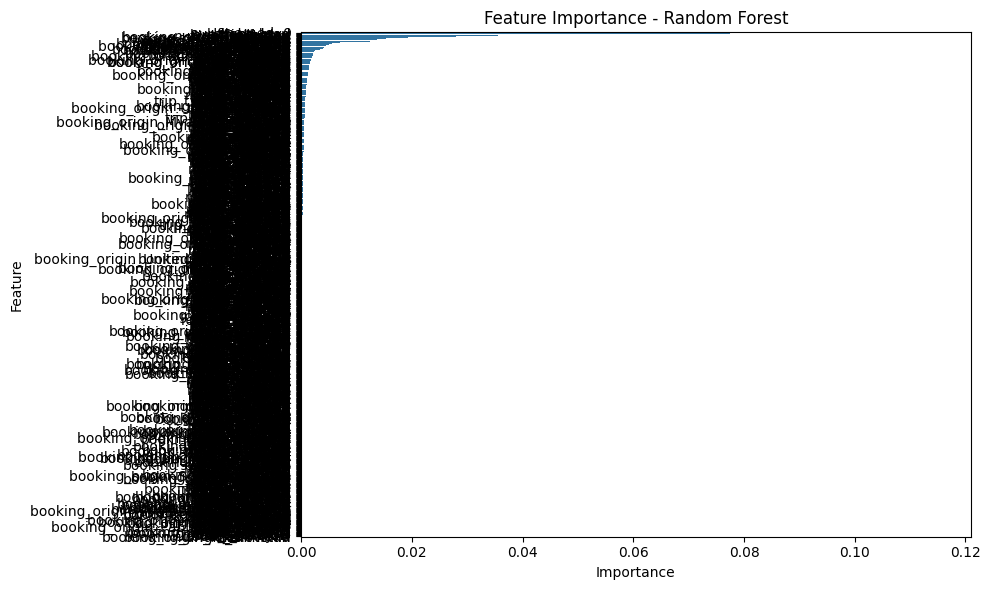

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df = pd.read_csv('enhanced customer_booking.csv')  


X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

X_encoded = pd.get_dummies(X)


model = RandomForestClassifier(random_state=42)


cv_scores = cross_val_score(model, X_encoded, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


importances = model.feature_importances_
feature_names = X_encoded.columns

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("enhanced customer_booking.csv")
df.head()

,Unnamed: 0,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_addons,time_of_day,is_weekend,is_group,long_stay
0,0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1,Morning,1,1,1
1,1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,Night,1,0,1
2,2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,2,Evening,0,1,1
3,3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1,Night,1,0,1
4,4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,2,Afternoon,0,1,1


C:\Users\RAMSHA\AppData\Local\Temp\ipykernel_9152\886358480.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='wants_preferred_seat', palette='Blues')


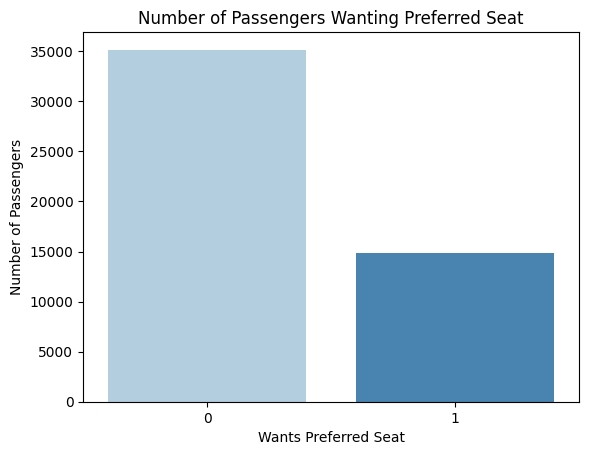

In [7]:
df['wants_preferred_seat'].value_counts()
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(data=df, x='wants_preferred_seat', palette='Blues')

plt.title('Number of Passengers Wanting Preferred Seat')
plt.xlabel('Wants Preferred Seat')
plt.ylabel('Number of Passengers')
plt.show()



C:\Users\RAMSHA\AppData\Local\Temp\ipykernel_9152\1502844962.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(addons.keys()), y=list(addons.values()), palette='Set2')


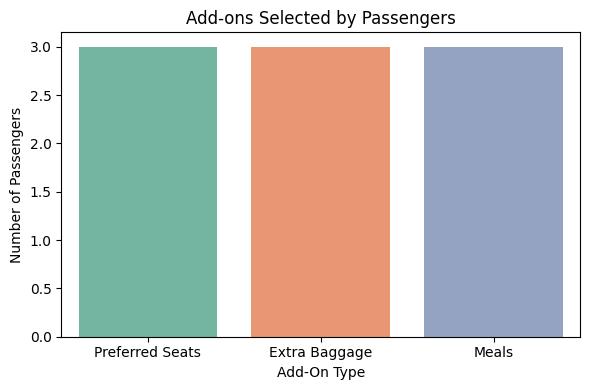

In [19]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = {
    'wants_preferred_seat': ['Yes', 'No', 'Yes', 'Yes', 'No'],
    'wants_extra_baggage': ['Yes', 'Yes', 'No', 'Yes', 'No'],
    'wants_in_flight_meals': ['No', 'Yes', 'Yes', 'Yes', 'No']
}
df = pd.DataFrame(data)


for col in ['wants_preferred_seat', 'wants_extra_baggage', 'wants_in_flight_meals']:
    df[col] = df[col].astype(str).str.strip().str.capitalize()

# Count 'Yes' values from each column
addons = {
    'Preferred Seats': df['wants_preferred_seat'].value_counts().get('Yes', 0),
    'Extra Baggage': df['wants_extra_baggage'].value_counts().get('Yes', 0),
    'Meals': df['wants_in_flight_meals'].value_counts().get('Yes', 0)
}


plt.figure(figsize=(6, 4))
sns.barplot(x=list(addons.keys()), y=list(addons.values()), palette='Set2')
plt.title('Add-ons Selected by Passengers')
plt.xlabel('Add-On Type')
plt.ylabel('Number of Passengers')
plt.tight_layout()
plt.show()

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             50000 non-null  int64  
 1   num_passengers         50000 non-null  int64  
 2   sales_channel          50000 non-null  object 
 3   trip_type              50000 non-null  object 
 4   purchase_lead          50000 non-null  int64  
 5   length_of_stay         50000 non-null  int64  
 6   flight_hour            50000 non-null  int64  
 7   flight_day             50000 non-null  int64  
 8   route                  50000 non-null  object 
 9   booking_origin         50000 non-null  object 
 10  wants_extra_baggage    50000 non-null  int64  
 11  wants_preferred_seat   50000 non-null  int64  
 12  wants_in_flight_meals  50000 non-null  int64  
 13  flight_duration        50000 non-null  float64
 14  booking_complete       50000 non-null 

None


📈 Descriptive Statistics for Numeric Columns:


,Unnamed: 0,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_addons,is_weekend,is_group,long_stay
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,24999.500000,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560,1.392880,0.251460,0.372960,0.506540
std,14433.901067,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643,1.003766,0.433857,0.483596,0.499962
min,0.000000,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12499.750000,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,24999.500000,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,37499.250000,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000,2.000000,1.000000,1.000000,1.000000
max,49999.000000,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000,3.000000,1.000000,1.000000,1.000000



🔹 Column: sales_channel


,Count,Percentage (%)
sales_channel,,
Internet,44382,88.76
Mobile,5618,11.24


C:\Users\RAMSHA\AppData\Local\Temp\ipykernel_18888\2339284006.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


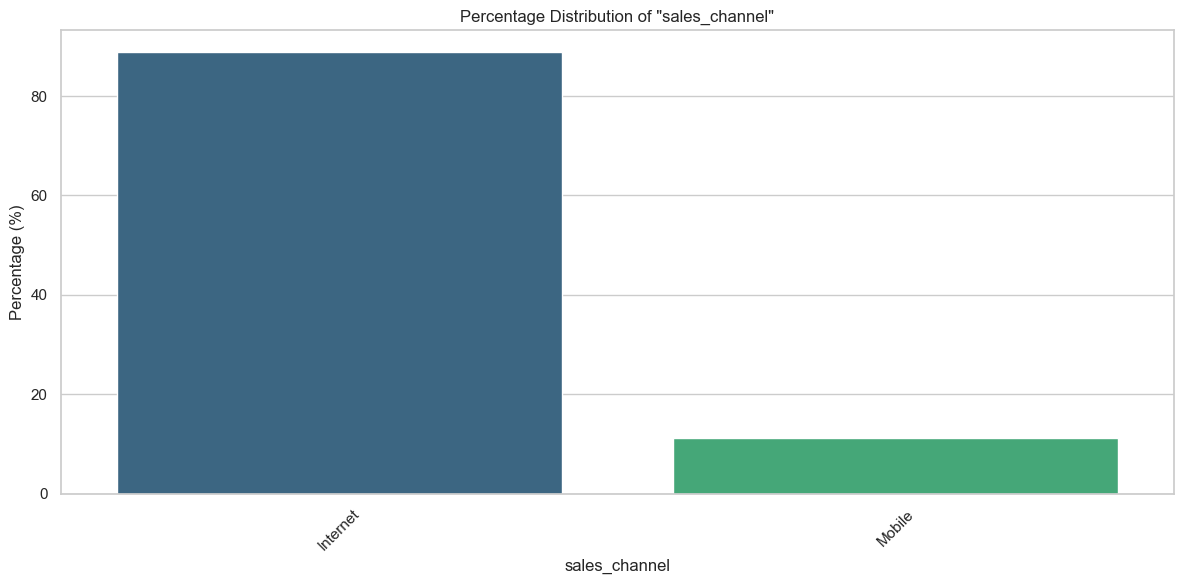


🔹 Column: trip_type


,Count,Percentage (%)
trip_type,,
RoundTrip,49497,98.99
OneWay,387,0.77
CircleTrip,116,0.23


C:\Users\RAMSHA\AppData\Local\Temp\ipykernel_18888\2339284006.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


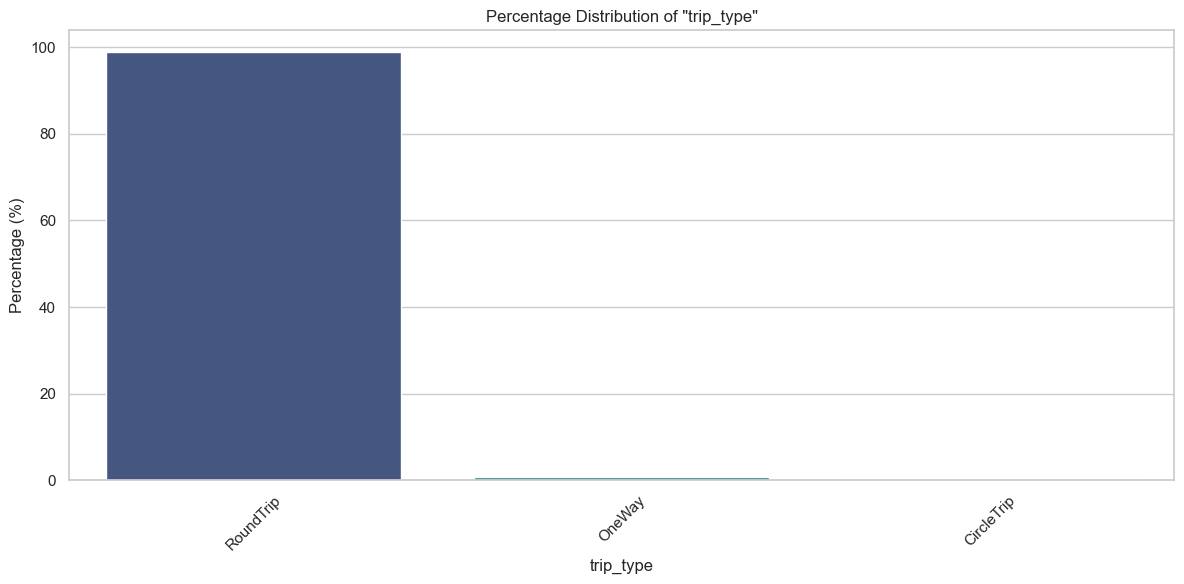


🔹 Column: flight_day


,Count,Percentage (%)
flight_day,,
1,8102,16.20
3,7674,15.35
2,7673,15.35
4,7424,14.85
5,6761,13.52
7,6554,13.11
6,5812,11.62


C:\Users\RAMSHA\AppData\Local\Temp\ipykernel_18888\2339284006.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


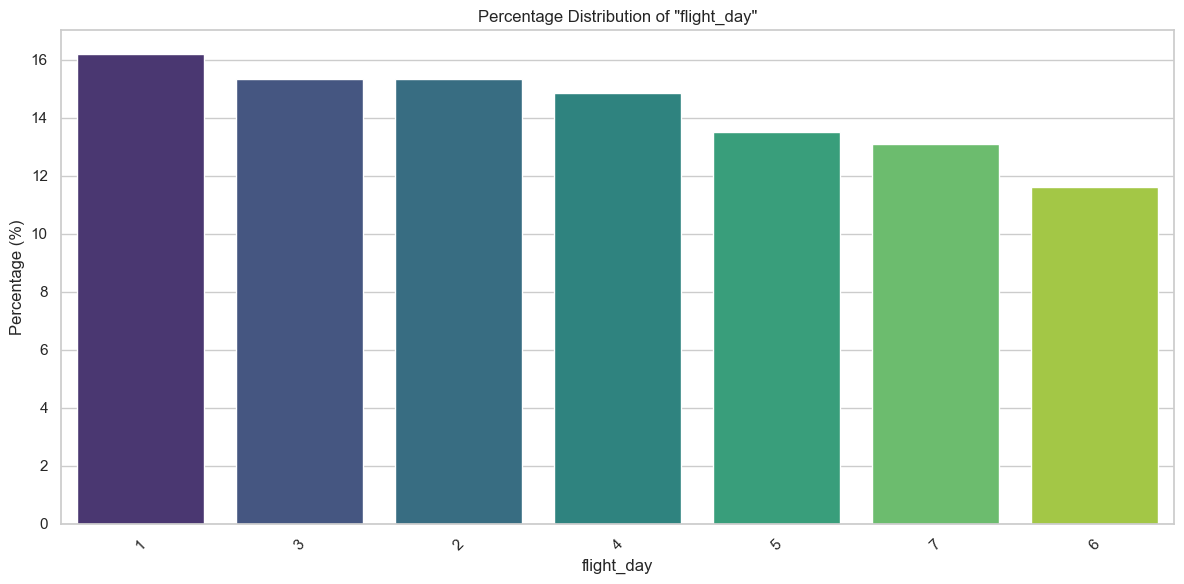


🔹 Column: route


,Count,Percentage (%)
route,,
AKLKUL,2680,5.36
PENTPE,924,1.85
MELSGN,842,1.68
ICNSIN,801,1.60
DMKKIX,744,1.49
...,...,...
HKTJED,1,0.00
KBRWUH,1,0.00
KTMTWU,1,0.00


C:\Users\RAMSHA\AppData\Local\Temp\ipykernel_18888\2339284006.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


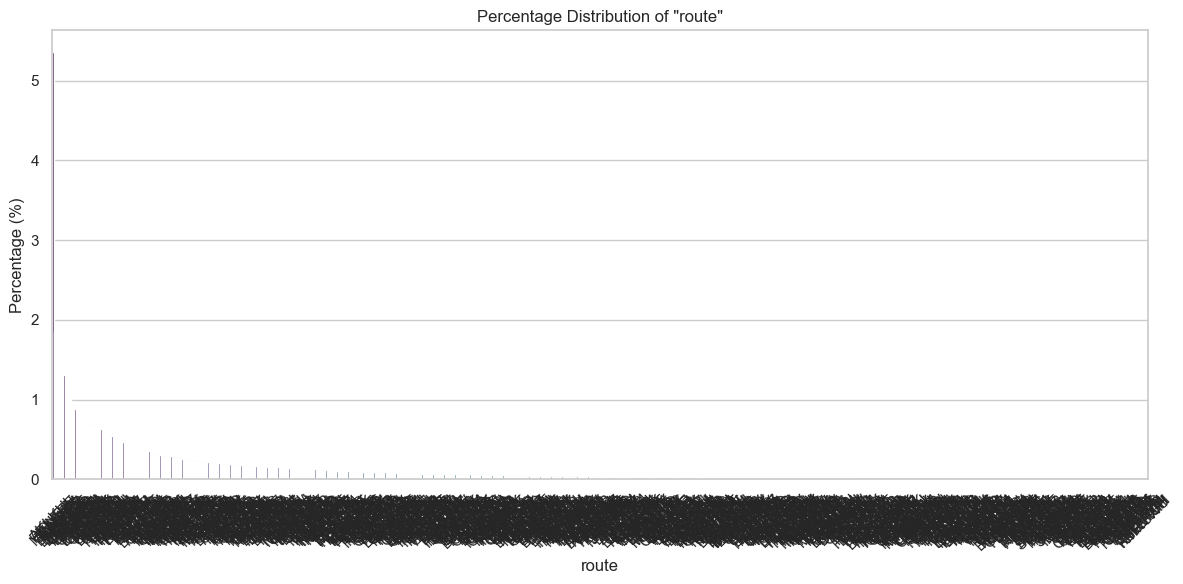


🔹 Column: booking_origin


,Count,Percentage (%)
booking_origin,,
Australia,17872,35.74
Malaysia,7174,14.35
South Korea,4559,9.12
Japan,3885,7.77
China,3387,6.77
...,...,...
Ghana,1,0.00
Gibraltar,1,0.00
Guatemala,1,0.00


C:\Users\RAMSHA\AppData\Local\Temp\ipykernel_18888\2339284006.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


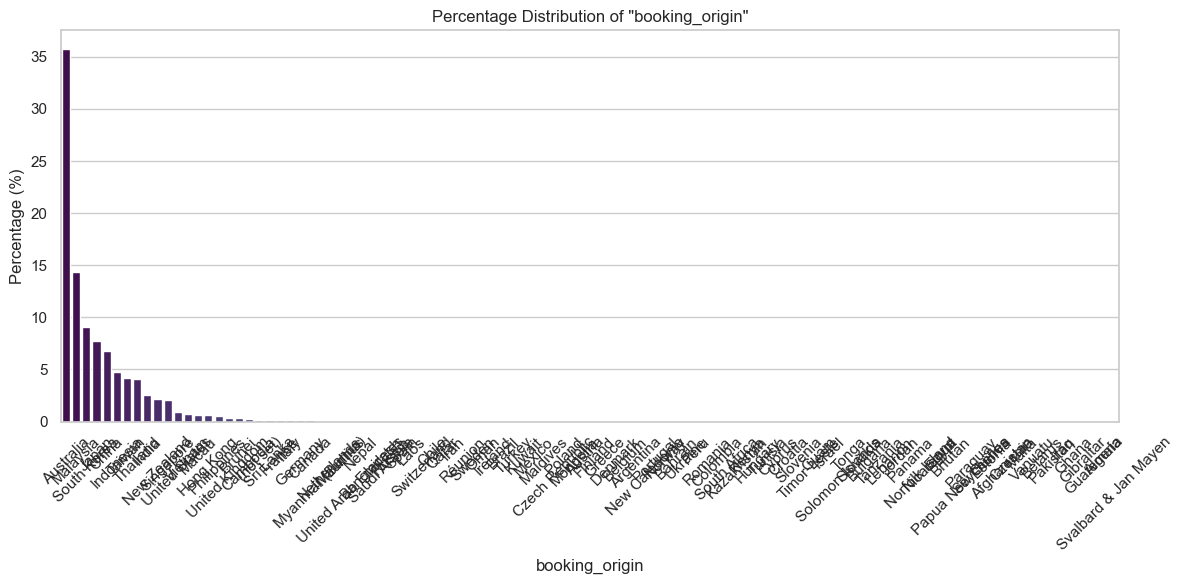


🔹 Column: wants_extra_baggage


,Count,Percentage (%)
wants_extra_baggage,,
1,33439,66.88
0,16561,33.12


C:\Users\RAMSHA\AppData\Local\Temp\ipykernel_18888\2339284006.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


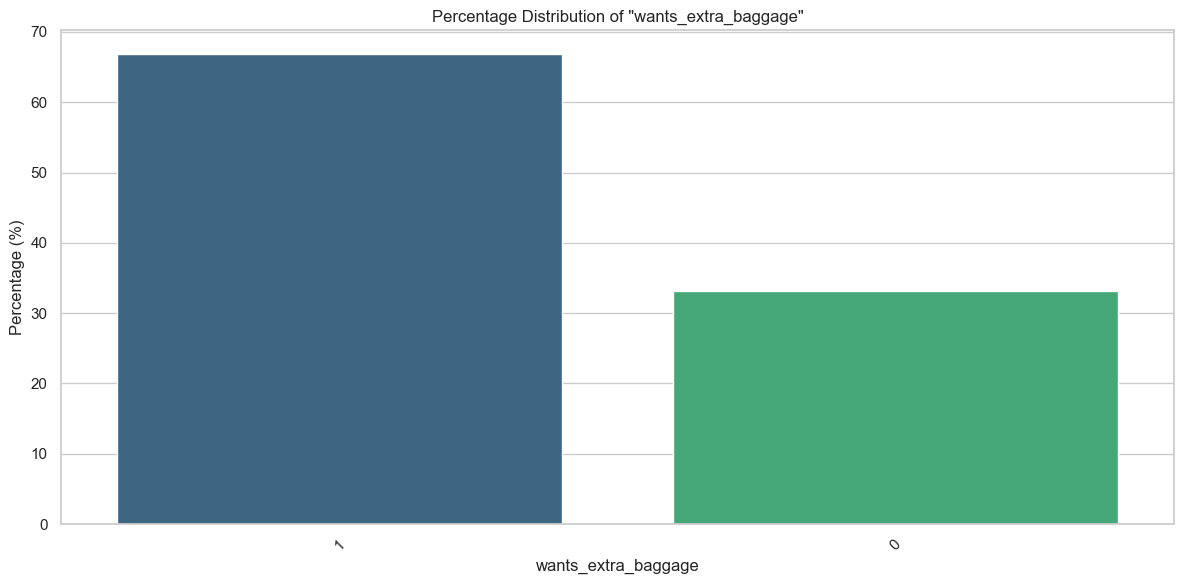


🔹 Column: wants_preferred_seat


,Count,Percentage (%)
wants_preferred_seat,,
0,35152,70.3
1,14848,29.7


C:\Users\RAMSHA\AppData\Local\Temp\ipykernel_18888\2339284006.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


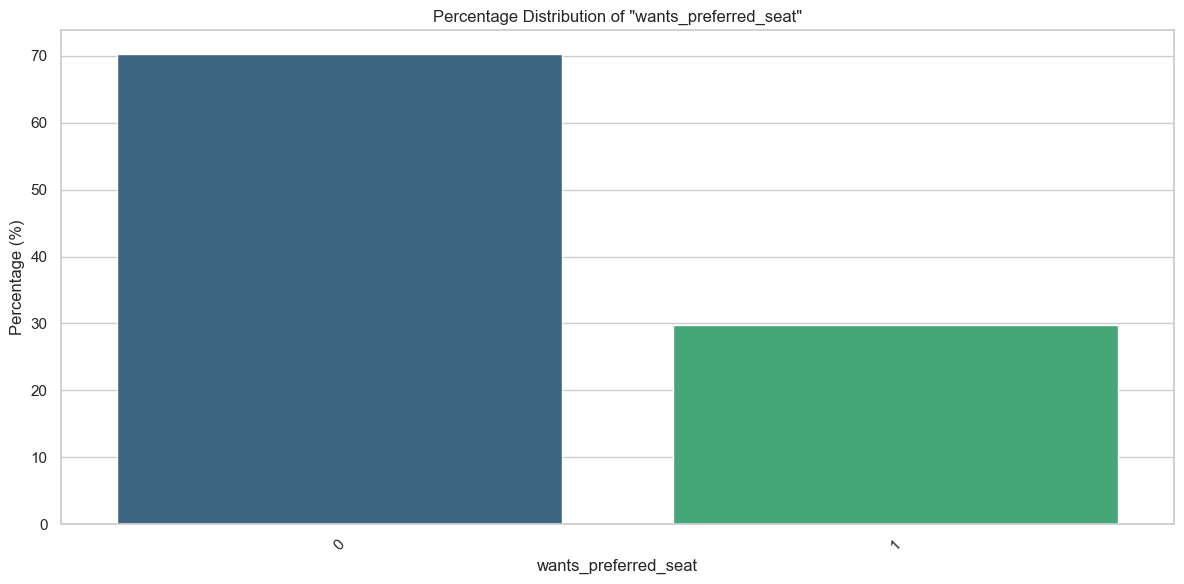


🔹 Column: wants_in_flight_meals


,Count,Percentage (%)
wants_in_flight_meals,,
0,28643,57.29
1,21357,42.71


C:\Users\RAMSHA\AppData\Local\Temp\ipykernel_18888\2339284006.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


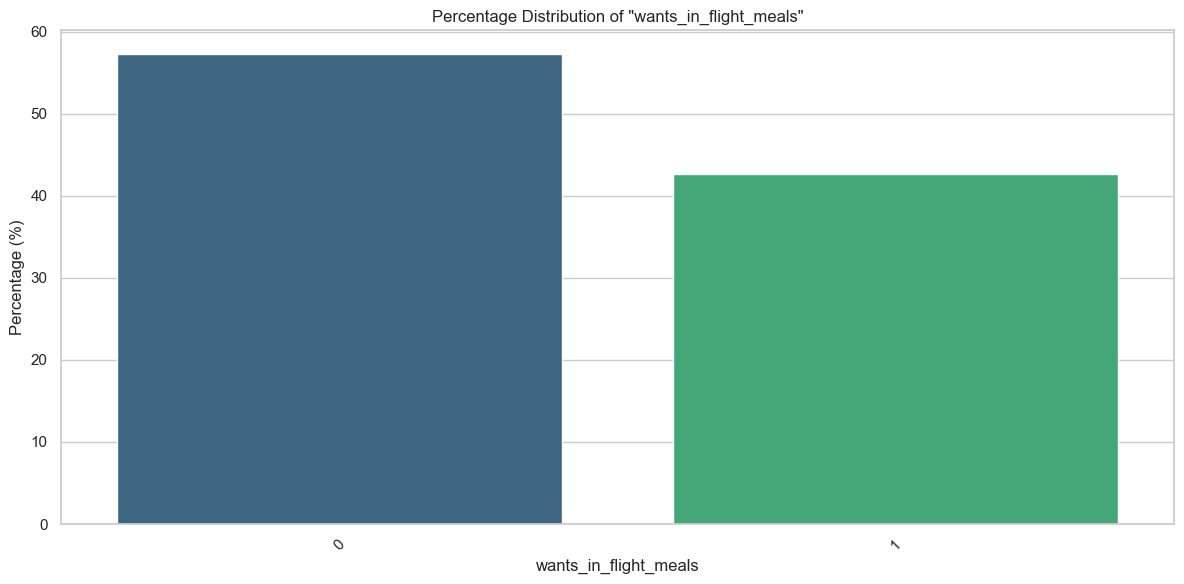


🔹 Column: booking_complete


,Count,Percentage (%)
booking_complete,,
0,42522,85.04
1,7478,14.96


C:\Users\RAMSHA\AppData\Local\Temp\ipykernel_18888\2339284006.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


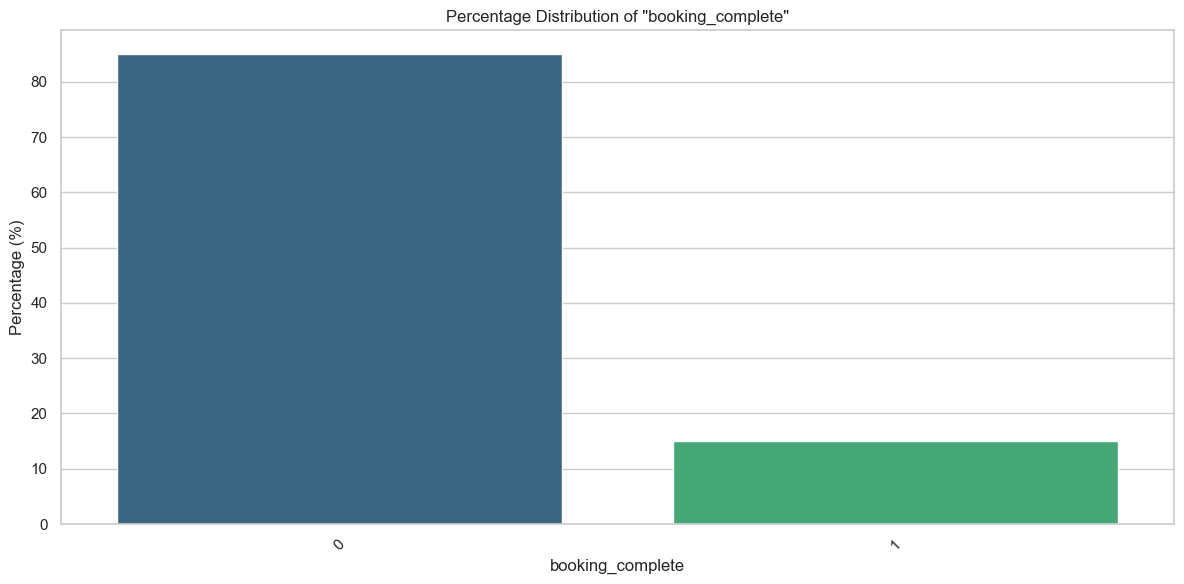


🔹 Column: time_of_day


,Count,Percentage (%)
time_of_day,,
Morning,21519,43.04
Night,13722,27.44
Afternoon,12888,25.78
Evening,1871,3.74


C:\Users\RAMSHA\AppData\Local\Temp\ipykernel_18888\2339284006.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


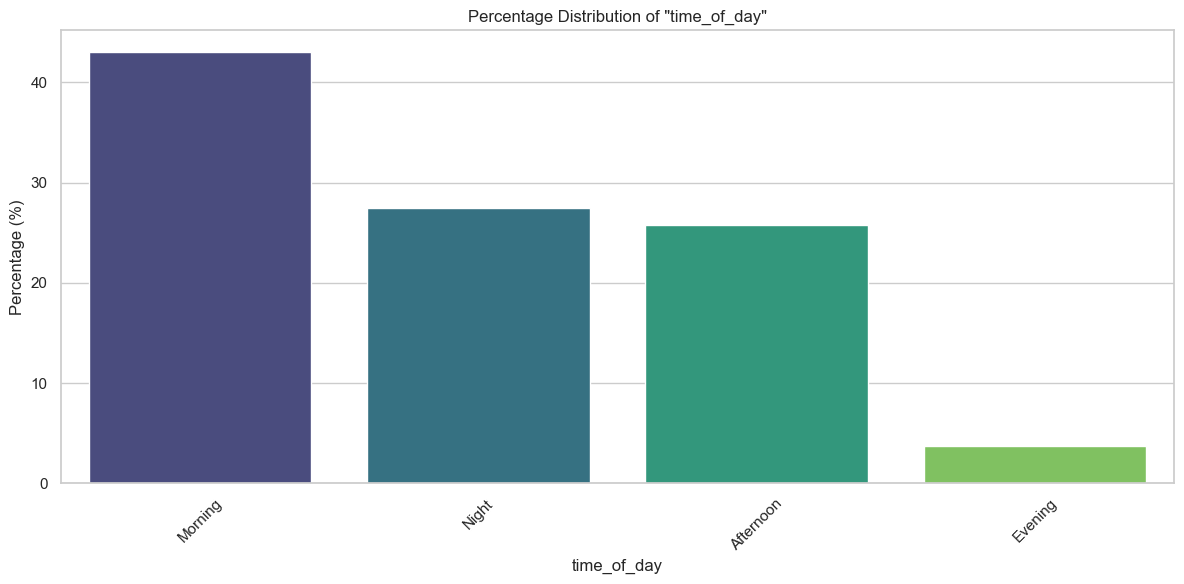


🔹 Column: is_weekend


,Count,Percentage (%)
is_weekend,,
0,37427,74.85
1,12573,25.15


C:\Users\RAMSHA\AppData\Local\Temp\ipykernel_18888\2339284006.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


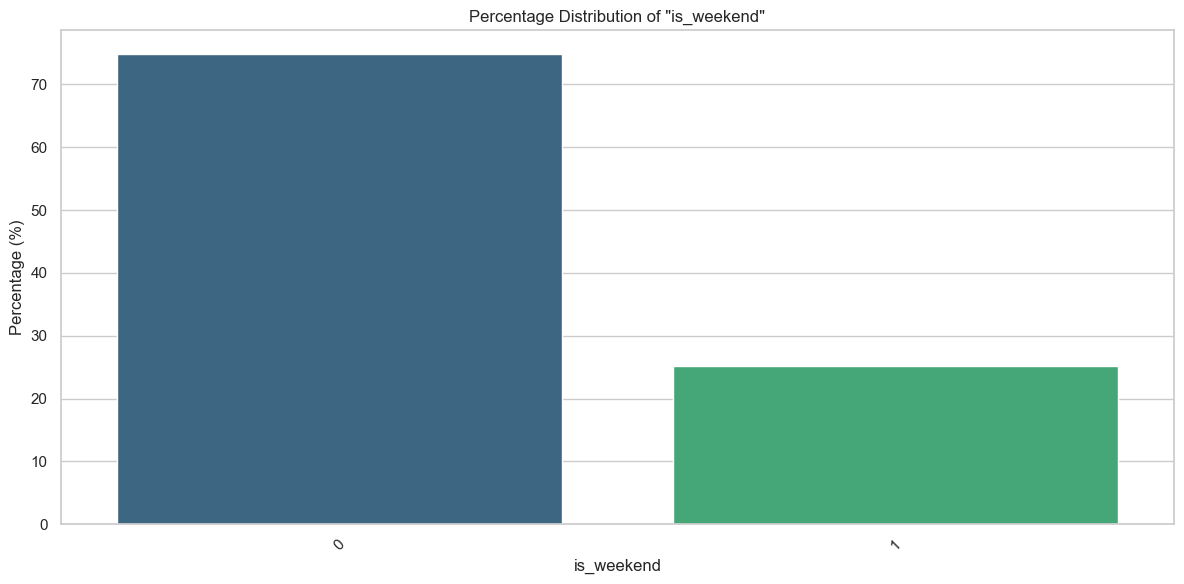


🔹 Column: is_group


,Count,Percentage (%)
is_group,,
0,31352,62.7
1,18648,37.3


C:\Users\RAMSHA\AppData\Local\Temp\ipykernel_18888\2339284006.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


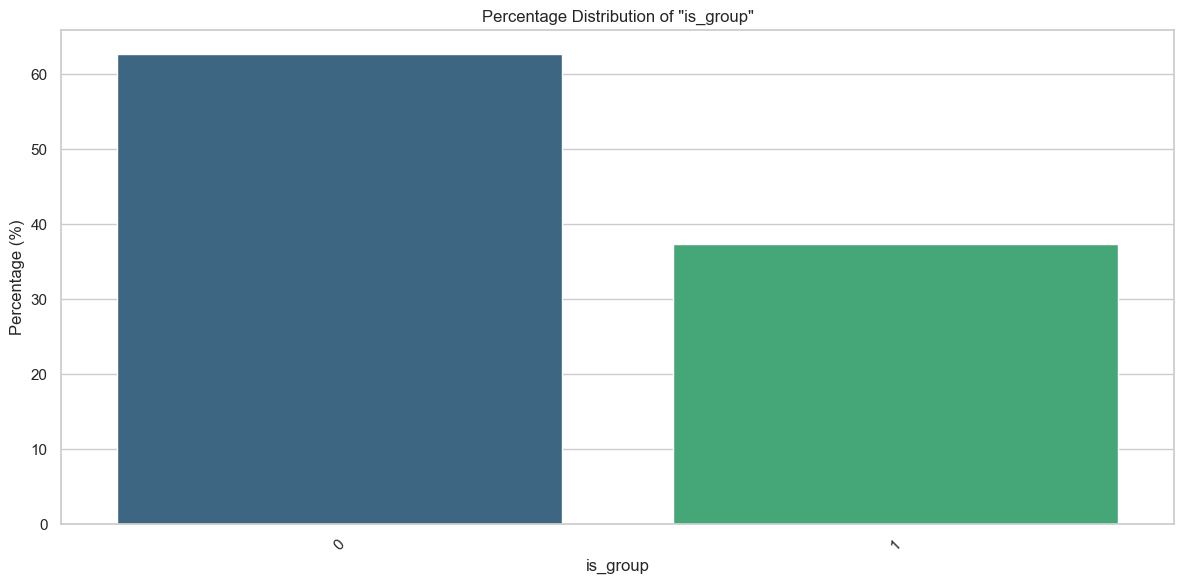


🔹 Column: long_stay


,Count,Percentage (%)
long_stay,,
1,25327,50.65
0,24673,49.35


C:\Users\RAMSHA\AppData\Local\Temp\ipykernel_18888\2339284006.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


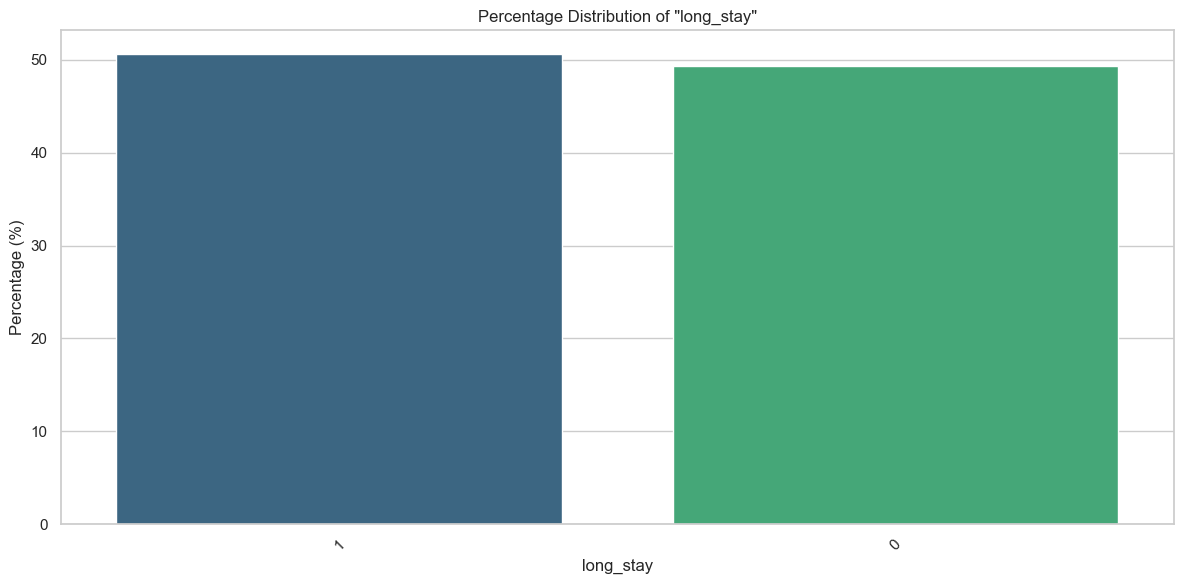

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Inline plotting for Jupyter
%matplotlib inline

# Load your dataset (replace with your actual file path)
df = pd.read_csv('enhanced customer_booking.csv')  # e.g., 'data/flight_data.csv'

# Set aesthetics
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Basic Overview
print("📊 Dataset Info:")
display(df.info())
print("\n📈 Descriptive Statistics for Numeric Columns:")
display(df.describe())

# Define categorical or boolean columns for percentage distribution
cat_cols = [
    'sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin',
    'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
    'booking_complete', 'time_of_day', 'is_weekend', 'is_group', 'long_stay'
]

# Plot percentage distribution for each categorical column
for col in cat_cols:
    print(f"\n🔹 Column: {col}")
    
    # Value counts and percentage
    value_counts = df[col].value_counts(dropna=False)
    percentages = df[col].value_counts(normalize=True, dropna=False) * 100
    summary_df = pd.DataFrame({'Count': value_counts, 'Percentage (%)': percentages.round(2)})
    
    # Display table
    display(summary_df)

    # Plot
    plt.figure()
    sns.barplot(
        x=percentages.index.astype(str),
        y=percentages.values,
        palette="viridis"
    )
    plt.title(f'Percentage Distribution of "{col}"')
    plt.ylabel('Percentage (%)')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
